In [3]:
import tarfile
import csv
import io
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
import matplotlib as mpl
import sys
mpl.rcParams['figure.figsize'] = (20,11)
from uuid import uuid4
import networkx as nx 
from tqdm.notebook import tqdm
tqdm.pandas()
from IPython.display import clear_output
import re
from io import StringIO
import zipfile
import pickle
sns.set_context('poster')
import numpy as np
from tqdm.keras import TqdmCallback
import tensorflow as tf
import csv

In [12]:
from Data import HeavyChainDataset
from Trainers import Trainer
from Models.HeavyChain import HeavyChainAlignAIRR

import pickle
with open('./SequenceSimulation/data/HeavyChain_DataConfig_OGRDB_V2.pkl','rb') as h:
    heavychain_config = pickle.load(h)
    
dataset = HeavyChainDataset(data_path="C:/Users/Tomas/Downloads/train_dataset.csv",
                            dataconfig=heavychain_config, batch_read_file=True)


trainer = Trainer(
            model=HeavyChainAlignAIRR,
            dataset=dataset,
            epochs=1,
            steps_per_epoch=1,
            verbose=1,
            )

trainer.model.build({'tokenized_sequence': (576, 1)})
MODEL_CHECKPOINT = model_checkpoint
print('Loading: ', MODEL_CHECKPOINT.split('/')[-1])
trainer.model.load_weights(
MODEL_CHECKPOINT)
print('Model Loaded!')

NameError: name 'HcExperimental' is not defined

In [8]:
import itertools
class IGHV_KalmanAlignment:
    def __init__(self, reference_sequence, K=1):
        self.K = K
        self.reference = self._generate_kmers(reference_sequence, K)
        self.n = len(self.reference)
        
        # Generate a list of all possible k-mers
        self.all_kmers = self._generate_all_kmers(K)
        self.kmer_count = len(self.all_kmers)
        
        # Initial state as a score for each k-mer for each position
        self.state_estimate = np.zeros((self.n, self.kmer_count))
        for i, kmer in enumerate(self.reference):
            idx = self.all_kmers.index(kmer)
            self.state_estimate[i][idx] = 1
        
        # Initial covariance matrices
        self.state_covariance = np.eye(self.kmer_count) * 0.1
        
        # Process and measurement noise covariances
        self.Q = np.eye(self.kmer_count) * 0.01
        self.R = np.eye(self.kmer_count) * 0.01

    def _generate_kmers(self, sequence, K):
        return [sequence[i:i+K] for i in range(len(sequence) - K + 1)]

    def _generate_all_kmers(self, K):
        nucleotides = ['A', 'T', 'C', 'G']
        return [''.join(p) for p in itertools.product(nucleotides, repeat=K)]

    # ... [rest of the class, with necessary modifications]

    def _kmer_to_vector(self, kmer):
        vector = np.zeros(self.kmer_count)
        idx = self.all_kmers.index(kmer)
        vector[idx] = 1
        return vector

    def learn_from_samples(self, sample_sequences):
        # Initialize transition matrix and mutation rates
        transition_matrix = np.zeros((self.kmer_count, self.kmer_count))
        mutation_rates = np.zeros(self.kmer_count)

        for seq in sample_sequences:
            kmers = self._generate_kmers(seq, self.K)
            for i in range(len(kmers) - 1):
                current_kmer = kmers[i]
                next_kmer = kmers[i+1]

                current_idx = self.all_kmers.index(current_kmer)
                next_idx = self.all_kmers.index(next_kmer)

                # Update transition matrix
                transition_matrix[current_idx][next_idx] += 1

                # Update mutation rates
                if current_kmer != self.reference[i]:
                    mutation_rates[current_idx] += 1

        # Normalize transition matrix to get probabilities
        transition_matrix /= transition_matrix.sum(axis=1, keepdims=True)

        # Normalize mutation rates
        mutation_rates /= len(sample_sequences)

        # Update class attributes
        self.transition_matrix = transition_matrix
        self.mutation_rates = mutation_rates


# Example usage:
reference_sequence = "ATCG"
sequence_to_align = "ATGG"

kalman_aligner = IGHV_KalmanAlignment(reference_sequence)
alignment, residuals = kalman_aligner.align(sequence_to_align)

print("Alignment:", [kalman_aligner._number_to_nucleotide(np.argmax(a)) for a in alignment])
print("Residuals:", residuals)


AttributeError: 'IGHV_KalmanAlignment' object has no attribute 'align'

In [3]:
t = pd.read_table('E:/Immunobiology/Data/HIV C1/015V04005438_CFAR.tsv')

C:\Users\Tomas\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3398: DtypeWarning: Columns (81,82,88) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
t2 = pd.read_table('E:/Immunobiology/Data/HIV C1/015V05006625_CFAR.tsv')

C:\Users\Tomas\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3398: DtypeWarning: Columns (81,82,83,88,93) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [9]:
len(set(t['cdr3_rearrangement'].dropna())&set(t2['cdr3_rearrangement'].dropna()))

16

In [11]:
len(set(t['cdr3_amino_acid'].dropna())&set(t2['cdr3_amino_acid'].dropna()))

237

In [3]:

# Importing the library
import psutil
def ram_usage():
    # Getting % usage of virtual_memory ( 3rd field)
    print('RAM memory % used:', psutil.virtual_memory()[2])
    # Getting usage of virtual_memory in GB ( 4th field)
    print('RAM Used (GB):', psutil.virtual_memory()[3]/1000000000)



In [3]:
ubd = VDeepJUnbondedDataset(nucleotide_add_coef=110)

In [4]:
g = ubd.generate_single()
g.mutated_seq

'GAGGTACAGCTGGTGGAGTCTGANGGAGGCTTGGTCCAGCCGGGGGGGTCCCTGCGACTCTCCCGTGTAGCCTCGNGATTCCTCGTCACAGCCGGTTACANGANCTGGGTCCGCCGGACTCCAGGAAAGGGGCTGGAGTGGGTCTCACTGCTTTACTCTGATCANAATACACTTCACCCAGACTCGATGAAGGGCCGCTTCACCATTTCCCGAGACTACTTCCCCAGTACTGTGTATCTTCACNTGAGTACTCTCAGAAATGAAGACACGGCTGTCTATTATTGTGNTATTTCGGTTGGCTGTACCTTCCACCGCGTTACGGTAACCATAAGGCACCTACAACATTGGGGCCAGGGCATCGTGGTCACCGTCTCATCAG'

In [5]:
for i in ubd.get_train_dataset().as_numpy_iterator():
    x,y = list(i)
    print(512-sum(map(lambda x: x == 0, x['tokenized_sequence'][0])))
    break

379


In [2]:
from VDeepJModelExperimental import VDeepJAllignExperimental

In [4]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
Reduce_lr = ReduceLROnPlateau(monitor='v_allele_categorical_accuracy', factor=0.8,
                              patience=1,min_delta=1e-32,mode='auto')

In [6]:
# trainer = UnboundedTrainer(  VDeepJAllignExperimental,epochs=5,batch_size=64,steps_per_epoch=1_000_000,verbose=1,
#                              corrupt_beginning=True,
#                              classification_head_metric='categorical_accuracy',
#                              interval_head_metric=tf.keras.losses.log_cosh,
#                              corrupt_proba=0.4,
#                              use_gene_masking=False,
#                              nucleotide_add_coef=110,
#                              nucleotide_remove_coef=110,
#                              random_sequence_add_proba=0.45,
#                              single_base_stream_proba=0.05,
#                              duplicate_leading_proba=0.25,
#                              random_allele_proba=0.25,
#                              num_parallel_calls = 45,
#                              log_to_file=True,log_file_name='log',log_file_path='C:/Users/Tomas/Downloads/',callbacks=[Reduce_lr],optimizers_params={'clipnorm' : 1}
#                              )

In [2]:
from VDeepJUnbondedDataset import VDeepJUnbondedDatasetSingleBeam
from VDeepJModelExperimental import VDeepJAllignExperimentalSingleBeam,VDeepJAllignExperimentalSingleBeam2
from UnboundedTrainer import SingleBeamUnboundedTrainer
ds = VDeepJUnbondedDatasetSingleBeam(nucleotide_add_coef=210,nucleotide_remove_coef=510)
import random
from tensorflow.keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='v_allele_categorical_accuracy', factor=0.8,
                              patience=1,min_delta=1e-32,mode='auto')

In [74]:
trainer = SingleBeamUnboundedTrainer(
    VDeepJAllignExperimentalSingleBeam2,
    epochs=1,
    batch_size=32,
    steps_per_epoch=150_000,
    verbose=1,
    corrupt_beginning=True,
    classification_head_metric=[tf.keras.metrics.AUC(),tf.keras.metrics.AUC(),tf.keras.metrics.AUC()],
    interval_head_metric=tf.keras.losses.mae,
    corrupt_proba=1,
    nucleotide_add_coef=210,
    nucleotide_remove_coef=330,
    random_sequence_add_proba=0.45,
    single_base_stream_proba=0.05,
    duplicate_leading_proba=0.25,
    random_allele_proba=0.25,
    num_parallel_calls=45,
    log_to_file=True,
    optimizers_params={"clipnorm": 1},
)

In [75]:
train_ds = trainer.train_dataset.get_train_dataset().prefetch(buffer_size=32)

<AxesSubplot:ylabel='Density'>

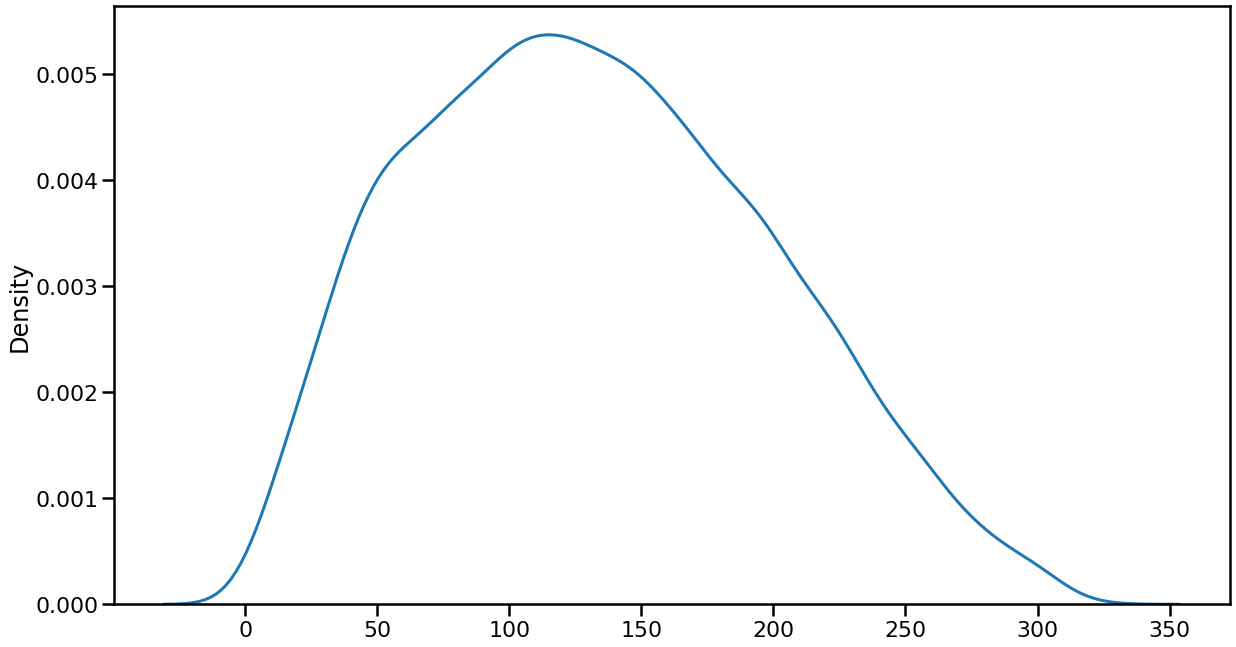

In [76]:
sns.kdeplot(trainer.train_dataset.sequence_corruptor._sample_nucleotide_remove_distribution(10000))

In [1]:
from VDeepJDataset import VDeepJDatasetSingleBeam
from Trainer import SingleBeamTrainer
from VDeepJModelExperimental import VDeepJAllignExperimentalSingleBeamRG

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
C:\Users\Tomas\anaconda3\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.6.0 and strictly below 2.9.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.9.1 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


In [2]:
dataset = VDeepJDatasetSingleBeam(data_path='C:/Users/Tomas/Downloads/AlignAIRR_Large_Train_Dataset.csv',
                                 batch_size=64,batch_read_file=True)

In [11]:
g = dataset._train_generator()

In [2]:
trainer = SingleBeamTrainer(model = VDeepJAllignExperimentalSingleBeamRG,epochs=5,steps_per_epoch=5500,data_path='C:/Users/Tomas/Downloads/AlignAIRR_Large_Train_Dataset.csv',
                                 batch_size=64,batch_read_file=True,verbose=True)

In [3]:
trainer.train()

Epoch 1/5
85/85 [==============================] - 24s 137ms/step - d_allele_categorical_accuracy: 0.0215 - d_end_mae: 326.1884 - d_start_mae: 345.0834 - j_allele_categorical_accuracy: 0.0853 - j_end_mae: 381.9600 - j_start_mae: 364.8090 - v_allele_categorical_accuracy: 0.0046 - v_end_mae: 167.5385 - v_start_mae: 48.1521 - loss: 46328.6523 - insec_loss: 29.0223 - mod3_mse_loss: 92627.9844 - total_classification_loss: 0.2984
Epoch 2/5
85/85 [==============================] - 12s 137ms/step - d_allele_categorical_accuracy: 0.0204 - d_end_mae: 193.0584 - d_start_mae: 275.9534 - j_allele_categorical_accuracy: 0.0853 - j_end_mae: 245.3757 - j_start_mae: 295.5459 - v_allele_categorical_accuracy: 0.0081 - v_end_mae: 7.3118 - v_start_mae: 41.1784 - loss: 22313.2402 - insec_loss: 315.5094 - mod3_mse_loss: 44310.7422 - total_classification_loss: 0.2225
Epoch 3/5
85/85 [==============================] - 12s 137ms/step - d_allele_categorical_accuracy: 0.0193 - d_end_mae: 99.8577 - d_start_mae: 222

In [18]:
from tqdm.auto import tqdm
# for i in tqdm(range(10000)):
#     next(g)
#next(g)

In [77]:
train_dataset = trainer.train_dataset.get_train_dataset()
train_dataset = train_dataset.prefetch(buffer_size=16)

def preprocess_data(*args):
    return args
train_ds = train_dataset.map(
    preprocess_data,
    num_parallel_calls=8
)

In [78]:
v_length = []
v_start = []
v_end = []
r = tqdm(train_ds)
for i in r:
    Vl = (i[1]['v_end']-i[1]['v_start'])
    v_length+= list(Vl.numpy())
    v_start+= list(i[1]['v_start'].numpy())
    v_end+= list(i[1]['v_end'].numpy())

    r.set_postfix({'N':len(v_length)})
    if len(v_length) > 30_000:
        break

0it [00:00, ?it/s]

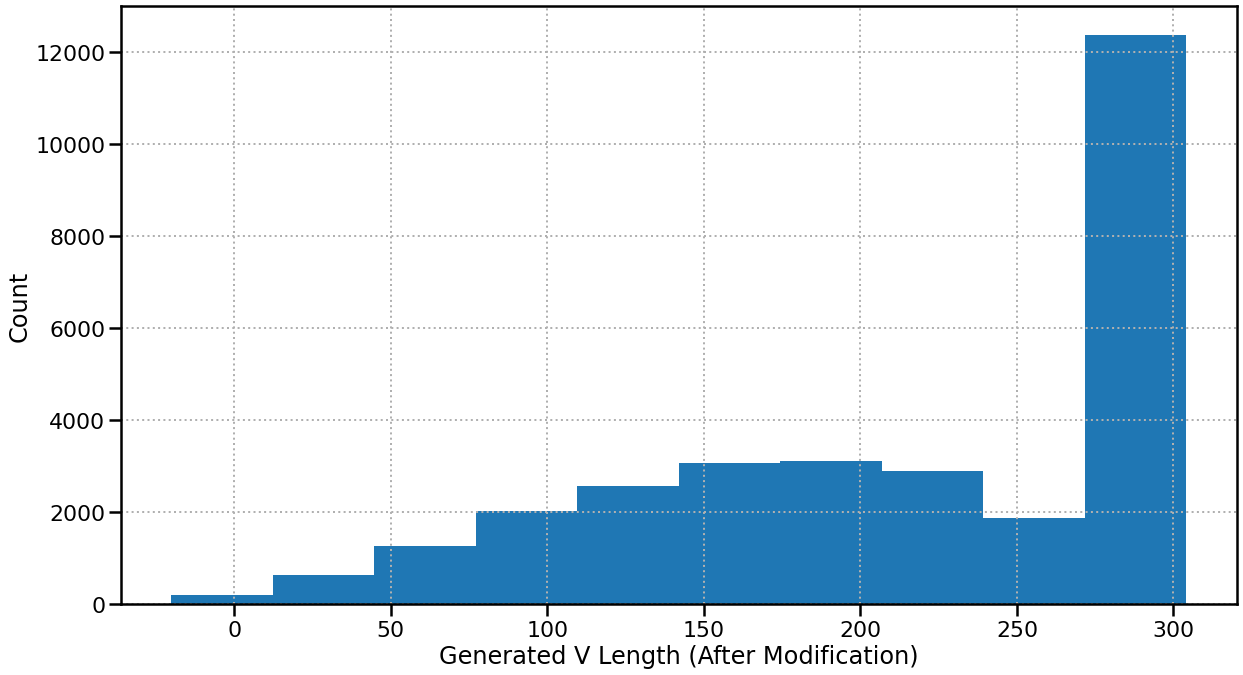

In [79]:
plt.hist(v_length)
plt.xlabel('Generated V Length (After Modification)')
plt.ylabel('Count')
plt.grid(lw=2,ls=':')

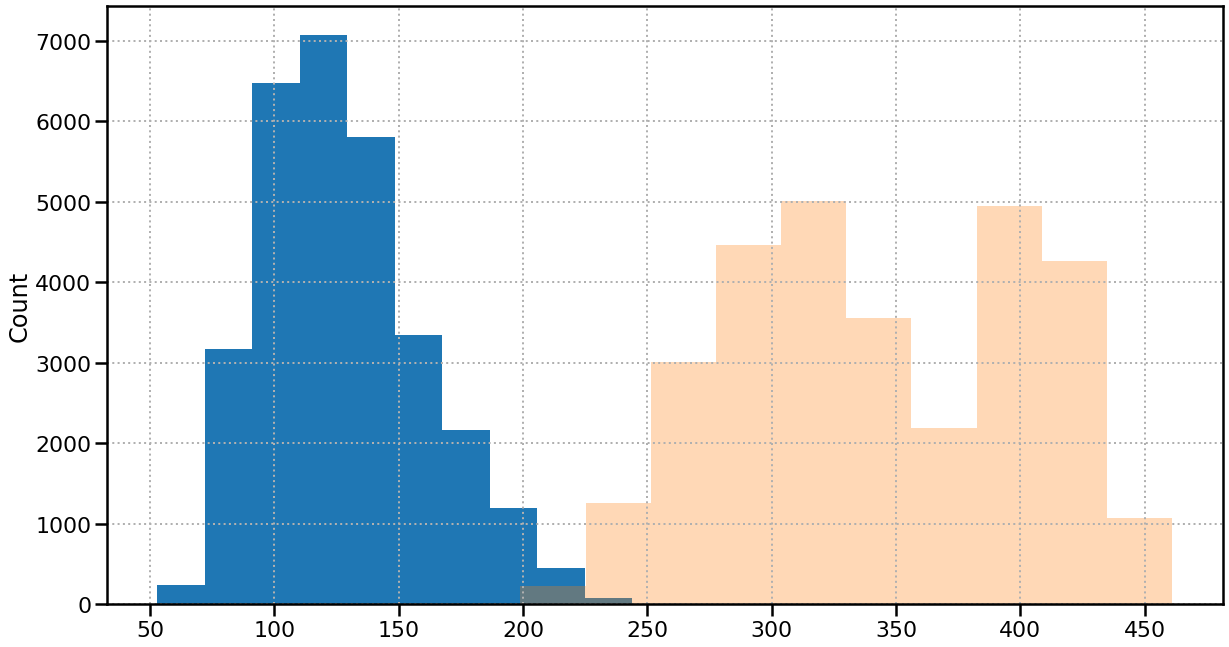

In [81]:
plt.hist(v_start)
plt.hist(v_end,alpha=0.3)
#plt.xlabel('Generated V Length (After Modification)')
plt.ylabel('Count')
plt.grid(lw=2,ls=':')

In [7]:
ds = VDeepJUnbondedDatasetSingleBeam(nucleotide_add_coef=210,nucleotide_remove_coef=310,corrupt_proba=1,
                             random_sequence_add_proba=0.45,
                             single_base_stream_proba=0.05,
                             duplicate_leading_proba=0.25,
                             random_allele_proba=0.25)


In [4]:
s = [ds.sequence_corruptor._sample_add_remove_distribution().item()  for i in range(2000)]
pd.Series(s).value_counts()

1    825
2    770
3    405
dtype: int64

In [21]:
seq_len = []
removed = []
amount = []
pstart = []
pend = []
v_start = []
j_end=[]
v_end=[]
d_start = []
d_end = []
j_start = []
total_len = []
seqs = []
mut_seqs = []
padded_seqs = []
for i in range(10):
    seq = ds.generate_single()
    seq_len.append(seq.v_seq_end-seq.v_seq_start)
    total_len.append(len(seq.mutated_seq))
    ms,action,amount_changed = ds.sequence_corruptor._corrupt_sequence_beginning(seq.mutated_seq)
    seqs.append(seq.mutated_seq)
    mut_seqs.append(ms)
    padded_array, start, end = ds.sequence_corruptor._process_and_dpad(ms, ds.sequence_corruptor.max_length)
    padded_seqs.append(padded_array)
    removed.append(action)
    amount.append(amount_changed)
    pstart.append(start)
    pend.append(end)
    
    O_row = pd.Series({'v_sequence_start':seq.v_seq_start,'v_sequence_end':seq.v_seq_end,'d_sequence_start':seq.d_seq_start,'d_sequence_end':seq.d_seq_end,'j_sequence_start':seq.j_seq_start,'j_sequence_end':seq.j_seq_end})
    
    adjusted_v_start = None
    adjusted_v_end = None
    adjusted_d_start = None
    adjusted_d_end = None
    adjusted_j_start = None
    adjusted_j_end = None
    row = pd.Series({'v_sequence_start':seq.v_seq_start,'v_sequence_end':seq.v_seq_end,'d_sequence_start':seq.d_seq_start,'d_sequence_end':seq.d_seq_end,'j_sequence_start':seq.j_seq_start,'j_sequence_end':seq.j_seq_end})
    if action == 1:  # remove only
        amount_removed = amount_changed
        adjusted_v_start = 0
        adjusted_v_end = row.v_sequence_end - amount_removed
        adjusted_d_start = row.d_sequence_start - amount_removed
        adjusted_d_end = row.d_sequence_end - amount_removed
        adjusted_j_start = row.j_sequence_start - amount_removed
        adjusted_j_end = row.j_sequence_end - amount_removed

    elif action == 2:  # add only:
        amount_added = amount_changed
        adjusted_v_start = amount_added
        adjusted_v_end = row.v_sequence_end + amount_added
        adjusted_d_start = row.d_sequence_start + amount_added
        adjusted_d_end = row.d_sequence_end + amount_added
        adjusted_j_start = row.j_sequence_start + amount_added
        adjusted_j_end = row.j_sequence_end + amount_added

    elif action == 3:  # remove and add
        amount_added, amount_removed = amount_changed

        adjusted_v_start = 0
        adjusted_v_end = row.v_sequence_end - amount_removed
        adjusted_d_start = row.d_sequence_start - amount_removed
        adjusted_d_end = row.d_sequence_end - amount_removed
        adjusted_j_start = row.j_sequence_start - amount_removed
        adjusted_j_end = row.j_sequence_end - amount_removed

        adjusted_v_start = adjusted_v_start + amount_added
        adjusted_v_end = adjusted_v_end + amount_added
        adjusted_d_start = adjusted_d_start + amount_added
        adjusted_d_end = adjusted_d_end + amount_added
        adjusted_j_start = adjusted_j_start + amount_added
        adjusted_j_end = adjusted_j_end + amount_added


    padded_array, start, end = ds.sequence_corruptor._process_and_dpad(ms, ds.sequence_corruptor.max_length)
    pad_size = start
    padded_seqs.append(padded_array)

    adjusted_v_start+=pad_size
    adjusted_v_end+=pad_size
    adjusted_d_start+=pad_size
    adjusted_d_end+=pad_size
    adjusted_j_start+=pad_size
    adjusted_j_end+=pad_size

    v_start.append((O_row['v_sequence_start'],adjusted_v_start))
    v_end.append((O_row['v_sequence_end'],adjusted_v_end))
    d_start.append((O_row['d_sequence_start'],adjusted_d_start))
    d_end.append((O_row['d_sequence_end'],adjusted_d_end))
    j_start.append((O_row['j_sequence_start'],adjusted_j_start))
    j_end.append((O_row['j_sequence_end'],adjusted_j_end))

In [24]:
row

v_sequence_start      1
v_sequence_end      296
d_sequence_start    303
d_sequence_end      306
j_sequence_start    308
j_sequence_end      352
dtype: int64

In [22]:
np.array(padded_seqs[2])[156:267]

array([3, 2, 2, 1, 4, 2, 4, 4, 1, 2, 4, 1, 3, 4, 1, 3, 2, 3, 1, 2, 2, 1,
       4, 2, 1, 4, 2, 3, 3, 3, 3, 4, 2, 3, 3, 1, 2, 4, 4, 3, 3, 4, 1, 3,
       4, 4, 4, 4, 4, 1, 3, 3, 3, 1, 1, 3, 3, 3, 3, 4, 2, 5, 3, 1, 3, 2,
       3, 3, 1, 2, 2, 3, 3, 3, 1, 4, 2, 1, 2, 4, 2, 1, 2, 4, 1, 2, 1, 3,
       2, 3, 3, 3, 1, 3, 4, 1, 4, 4, 2, 1, 4, 2, 1, 4, 1, 1, 4, 4, 4, 3,
       2])

In [23]:
rdf = pd.DataFrame({'orginal_full_len':total_len,'original_length':seq_len,'action':removed,'amount':amount,'padded_start':pstart,'padded_end':pend,
                   'padded_v_start':v_start,'padded_v_end':v_end,'padded_d_start':d_start,'padded_d_end':d_end,'padded_j_start':j_start,'padded_j_end':j_end})

rdf.action = rdf.action.map({1:'removed',2:'added',3:'added_removed'})
rdf['pad_size'] = (512-rdf.orginal_full_len)//2
rdf

,orginal_full_len,original_length,action,amount,padded_start,padded_end,padded_v_start,padded_v_end,padded_d_start,padded_d_end,padded_j_start,padded_j_end,pad_size
0,373,293,removed,21,80,431,"(1, 80)","(294, 353)","(306, 365)","(316, 375)","(328, 387)","(373, 432)",69
1,358,291,added,6,74,437,"(1, 80)","(292, 372)","(305, 385)","(313, 393)","(314, 394)","(358, 438)",77
2,376,290,added,99,19,494,"(1, 118)","(291, 409)","(314, 432)","(327, 445)","(329, 447)","(376, 494)",68
3,367,292,removed,164,155,358,"(1, 155)","(293, 284)","(301, 292)","(312, 303)","(315, 306)","(367, 358)",72
4,376,292,removed,19,78,435,"(1, 78)","(293, 352)","(309, 368)","(333, 392)","(339, 398)","(376, 435)",68
5,388,295,added_removed,"(10, 139)",127,386,"(1, 137)","(296, 294)","(309, 307)","(337, 335)","(339, 337)","(388, 386)",62
6,349,288,added_removed,"(6, 77)",117,394,"(1, 123)","(289, 335)","(297, 343)","(304, 350)","(309, 355)","(349, 395)",81
7,385,295,added_removed,"(6, 193)",157,354,"(1, 163)","(296, 266)","(305, 275)","(328, 298)","(334, 304)","(385, 355)",63
8,370,295,removed,129,136,377,"(1, 136)","(296, 303)","(301, 308)","(311, 318)","(319, 326)","(370, 377)",71
9,352,295,removed,169,165,348,"(1, 165)","(296, 292)","(303, 299)","(306, 302)","(308, 304)","(352, 348)",80


In [206]:
128*1171

149888

In [49]:
gseq = ds.generate_single()

original_v_start = gseq.v_seq_start
original_v_end = gseq.v_seq_end
original_d_start = gseq.d_seq_start
original_d_end = gseq.d_seq_end
original_j_start = gseq.j_seq_start
original_j_end = gseq.j_seq_end

seq, was_removed, amount_changed = ds.sequence_corruptor._corrupt_sequence_beginning(
    gseq.mutated_seq
)


padded_array, start, end = ds.sequence_corruptor._process_and_dpad(seq, ds.sequence_corruptor.max_length)
#padded_sequences.append(padded_array)
#PPPPPP_S_XXXXXXX_OS_GGGGGGG

to_corrupt = 1
if to_corrupt:
    if was_removed:
        # v is shorter
        _adjust = start-amount_changed
    else:
        # v is longer
        _adjust = start + amount_changed
        start += amount_changed
else:
    _adjust = start

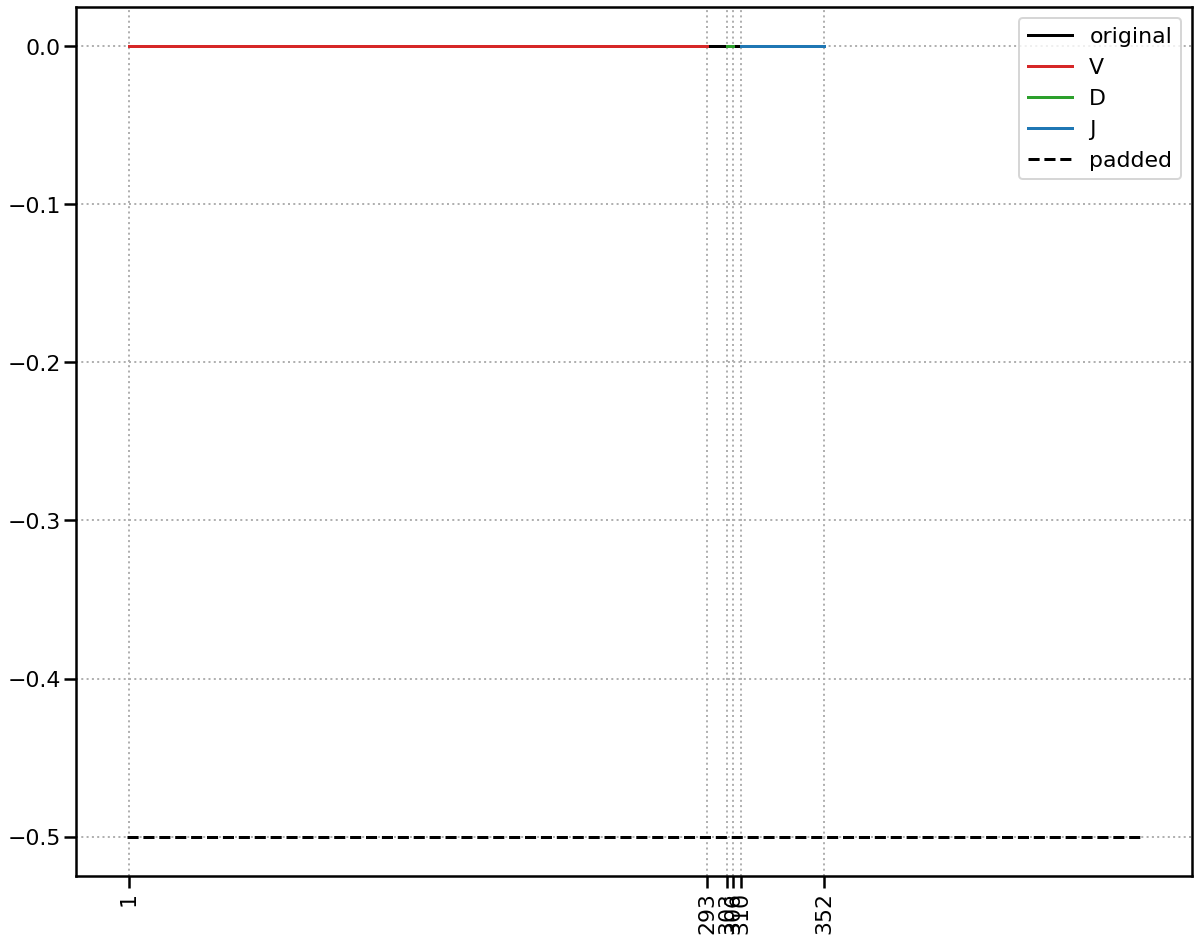

In [68]:
plt.figure(figsize=(20,16))

# original
plt.plot([original_v_start,original_j_end],[0,0],color='black',label='original')
plt.plot([original_v_start,original_v_end],[0,0],color='tab:red',label='V')
plt.plot([original_d_start,original_d_end],[0,0],color='tab:green',label='D')
plt.plot([original_j_start,original_j_end],[0,0],color='tab:blue',label='J')
#PADDED
plt.plot([0,512],[-0.5,-0.5],color='black',label='padded',ls='--')
#plt.plot([original_v_start,original_v_end],[0,0],color='tab:red',label='V')
#plt.plot([original_d_start,original_d_end],[0,0],color='tab:green',label='D')
#plt.plot([original_j_start,original_j_end],[0,0],color='tab:blue',label='J')

plt.xticks([original_v_start,original_v_end,original_d_start,original_d_end,original_j_start,original_j_end],rotation=90)
plt.grid(lw=2,ls=':')
plt.legend()

In [10]:
train_ds = ds.get_train_dataset().prefetch(16)

In [11]:
#trainer.train()

In [12]:
# train_ds = trainer.train_dataset.get_train_dataset()
# single_batch = train_ds.take(1)


In [13]:
#predicted = trainer.model.predict(single_batch)

In [14]:
#sns.histplot([ds.sequence_corruptor._sample_nucleotide_remove_distribution(1) for _ in range(10000)])

In [30]:
y['v_allele'].sum(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [117]:
allele_db = pd.read_csv('C:/Users/Tomas/Downloads/alleles_db.csv',index_col=2)

In [134]:
allele_db[allele_db['new_allele'] == 'IGHVF8-G45*06']

,new_allele,func_group,thresh,upper_range
imgt_allele,,,,
IGHV4-39*01_G315A,IGHVF8-G45*06,IGHVF8-G45,0.005,318


In [145]:
allele_db.loc['IGHV4-39*01_G315A',:]

new_allele     IGHVF8-G45*06
func_group        IGHVF8-G45
thresh                 0.005
upper_range              318
Name: IGHV4-39*01_G315A, dtype: object

In [146]:
from Bio import SeqIO
input_file = open("C:/Users/Tomas/Downloads/V-QUEST_IMGT_V-QUEST_reference_directory_Homo_sapiens_IG_IGHV.fasta.txt")
my_dict = SeqIO.to_dict(SeqIO.parse(input_file, "fasta"))
vquest = dict()
for key in my_dict:
    imgt_v = key.split('|')[1]
    if imgt_v not in allele_db.index:
        
        continue
        
    
    gapped_seq = str(my_dict[key].seq).upper()
    splited  = my_dict[key].description.split('|')
    
    
    aa = allele_db.loc[imgt_v,'new_allele']

    vquest[imgt_v] = {'sequence':gapped_seq,
                      'imgt_allele':aa,
                     'F':splited[3],
                     'pos':splited[5],
                     'ungapped_length':int(splited[6].split(' ')[0]),
                      'length_summary':splited[12]
                     }

In [152]:
# with open('E:/Immunobiology/AlignAIRR/vquest_allele_db.pkl','wb') as h:
#     pickle.dump(vquest,h)

vquest['IGHV4-39*01']

{'sequence': 'CAGCTGCAGCTGCAGGAGTCGGGCCCA...GGACTGGTGAAGCCTTCGGAGACCCTGTCCCTCACCTGCACTGTCTCTGGTGGCTCCATCAGC......AGTAGTAGTTACTACTGGGGCTGGATCCGCCAGCCCCCAGGGAAGGGGCTGGAGTGGATTGGGAGTATCTATTATAGT.........GGGAGCACCTACTACAACCCGTCCCTCAAG...AGTCGAGTCACCATATCCGTAGACACGTCCAAGAACCAGTTCTCCCTGAAGCTGAGCTCTGTGACCGCCGCAGACACGGCTGTGTATTACTGTGCGAGACA',
 'imgt_allele': 'IGHVF8-G45*07',
 'F': 'F',
 'pos': '11626..11924',
 'ungapped_length': 299,
 'length_summary': '299+21=320'}

In [7]:
def confidence_bound_search(pred, start=0, end=None, cb=0.95):
    if end is None:
        end = len(pred)

    if start > end:
        return end

    mid = (start + end) // 2
    sum_values = np.sum(pred[:mid])

    if sum_values >= cb and (mid == 1 or np.sum(pred[:mid-1]) < cb):
        return mid
    elif sum_values >= cb:
        return confidence_bound_search(pred, start, mid - 1, cb)
    else:
        return confidence_bound_search(pred, mid + 1, end, cb)
    
def confidence_bound(prediction,cb=0.95):
    ast = np.argsort(prediction)[::-1]
    return ast[:confidence_bound_search(prediction[ast],cb=cb)]


In [9]:
tf.__version__

'2.9.1'

In [8]:
t = np.array([0.1,0.4,0.3,0.1,0.1,0.1])
confidence_bound(t)

array([1, 2, 5, 4, 3], dtype=int64)

In [46]:
for ex,i in enumerate(trainer.model.layers):
    if type(i) == tf.keras.layers.Dense:
        if (np.max(i.weights[0])) != (np.max(i.weights[0])):
            print('Layer Index:',ex,'  Layer Name: ',i,i.name)
            print('Max Value at Layer Weights: ',np.max(i.weights[0]))
            print('=='*30)

Layer Index: 41   Layer Name:  <keras.layers.core.dense.Dense object at 0x000001931C6907F0> v_family_middle
Max Value at Layer Weights:  nan
Layer Index: 42   Layer Name:  <keras.layers.core.dense.Dense object at 0x000001931C690820> v_family
Max Value at Layer Weights:  nan
Layer Index: 44   Layer Name:  <keras.layers.core.dense.Dense object at 0x000001931CA561C0> v_gene_middle
Max Value at Layer Weights:  nan
Layer Index: 45   Layer Name:  <keras.layers.core.dense.Dense object at 0x000001931CA561F0> v_gene
Max Value at Layer Weights:  nan
Layer Index: 47   Layer Name:  <keras.layers.core.dense.Dense object at 0x000001931CA56B50> v_allele_middle
Max Value at Layer Weights:  nan
Layer Index: 48   Layer Name:  <keras.layers.core.dense.Dense object at 0x000001931CA56B80> v_allele
Max Value at Layer Weights:  nan
Layer Index: 50   Layer Name:  <keras.layers.core.dense.Dense object at 0x000001931CA5A520> v_gene_allele_distill
Max Value at Layer Weights:  nan


In [77]:
for ex,i in enumerate(trainer.model.layers):
    if len(i.weights) > 1:
        print(i.name,np.max(i.weights[0]),np.min(i.weights[0]),np.median(i.weights[0]))
        if np.max(i.weights[0]) != np.max(i.weights[0]):
            print(np.max(i.weights[0]))
            print(i.name)
            print(i)
            break

conv1d_and__batch_norm 1.6361611 -1.6818296 -0.0006089428
conv1d_and__batch_norm_1 1.3571036 -1.2683002 -0.01701276
conv1d_and__batch_norm_2 1.2821836 -1.3980745 -0.0033327243
conv1d_and__batch_norm_3 1.1993746 -1.0445809 -0.006815388
conv1d_and__batch_norm_4 nan nan nan
nan
conv1d_and__batch_norm_4


In [74]:
np.min(i.weights[0])

nan

In [10]:
precited = trainer.predict(r'E:\igor_generated_5M\test_set.tsv')

157/157 [==============================] - 3s 12ms/step


In [11]:
precited_pp = trainer.predict(r'E:\igor_generated_5M\test_set.tsv',raw=False,top_k=3)

157/157 [==============================] - 2s 12ms/step


In [12]:
np.argsort(np.array([0,5,2,7]))

array([0, 2, 1, 3], dtype=int64)

In [9]:
sn = trainer.save_model('C:/Users/Tomas/Downloads/test/')

Model Saved!
 Location: C:/Users/Tomas/Downloads/test/VDeepJModel_d25e4029-b0b0-4636-a4b4-3c339d120c28_weights


In [10]:
trainer.save_dataset_object('C:/Users/Tomas/Downloads/test/ds_object.ds')

Dataset Object Saved at C:/Users/Tomas/Downloads/test/ds_object.ds


In [12]:
lt = Trainer(VDeepJAllign,epochs=1,batch_size=64,verbose=1,
                 log_to_file=True,log_file_name='log',log_file_path='C:/Users/Tomas/Downloads/')

Keep in Mind no Dataset Was Loaded,
 Make Sure to Use "load_dataset" to Add a Train Dataset


In [13]:
lt.load_dataset_object('C:/Users/Tomas/Downloads/test/ds_object.ds')

In [14]:
#lt.load_dataset(r'E:\igor_generated_5M\test_set.tsv')
lt.rebuild_model()

In [15]:
lt.load_model(sn)

In [17]:
from VDeepJUnbondedDataset import global_genotype
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq
from Bio import AlignIO, SeqIO
from Bio.Align.Applications import ClustalOmegaCommandline

def allign_sequences(seqs):
    sequences = [
    SeqRecord(Seq(seq), id=f"seq{en}")
    for en,seq in enumerate(seqs)
    ]
    SeqIO.write(sequences, r"C:\Users\Tomas\Downloads\clustal-omega-1.2.2-win64\clustal-omega-1.2.2-win64\sequences.fasta", "fasta")

    # Define Clustal Omega command
    clustalomega_cline = ClustalOmegaCommandline(infile=r"C:\Users\Tomas\Downloads\clustal-omega-1.2.2-win64\clustal-omega-1.2.2-win64\sequences.fasta",
                                                 outfile=r"C:\Users\Tomas\Downloads\clustal-omega-1.2.2-win64\clustal-omega-1.2.2-win64\aligned.fasta", verbose=True, auto=True,force=True)
    clustalomega_cline.program_name = r"C:\Users\Tomas\Downloads\clustal-omega-1.2.2-win64\clustal-omega-1.2.2-win64\clustalo.exe"
    stdout, stderr = clustalomega_cline()

    alignment = AlignIO.read(r"C:\Users\Tomas\Downloads\clustal-omega-1.2.2-win64\clustal-omega-1.2.2-win64\aligned.fasta", "fasta")
    return alignment

In [61]:
V_Alleles = global_genotype()[0]['V']
V_Alleles = {i.name:i.ungapped_seq.upper() for i in V_Alleles}
#V_Alleles

In [215]:
import pickle
with open('E:/Immunobiology/AlignAIRR/V_Allele_F_dict.pkl','wb') as h:
    pickle.dump(V_Alleles,h)

In [205]:
allele_name = 'IGHVF5-G29*05'
allele = V_Alleles[allele_name]
allele = allele[250:]

#seqs = [allele]+list(V_Alleles.values())
#allingment = allign_sequences(seqs)

In [206]:
# adf = pd.DataFrame(data=[list(str(i.seq)) for i in allingment],index=['T']+list(V_Alleles))
# adf = adf.apply(lambda x: x == x.iloc[0],axis=0).iloc[1:,:]
# mdf = adf.sum(axis=1)
# mdf = ((mdf-mdf.min())/(mdf.max()-mdf.min())).sort_values(ascending=False)
# mdf[mdf<0.85] = 0
# mdf = mdf/mdf.sum()
# mdf = mdf.to_dict()
# #mdf

In [207]:
from Levenshtein import distance
ldf = pd.Series([distance(allele,i) for i in list(V_Alleles.values())],index=list(V_Alleles)).sort_values(ascending=True)
ldf = ldf[ldf<ldf.min()+3]
1-ldf/ldf.sum()

IGHVF8-G36*10          0.973842
IGHVF2-G17*06          0.973842
IGHVF2-G17*02          0.973842
IGHVF8-G37*03          0.973842
IGHVF8-G36*02          0.973842
IGHVF8-G36*07          0.973842
IGHVF2-G17*03          0.973842
IGHVF2-G8*02           0.973842
IGHVF8-G39*02          0.973842
IGHVF2-G8*03           0.973842
IGHVF8-G36*06          0.973628
IGHVF8-G36*05          0.973628
IGHVF8-G36*04          0.973628
IGHVF8-G36*03          0.973628
IGHVF8-G36*08          0.973628
IGHVF8-G36*09          0.973628
IGHVF8-G36*01          0.973628
IGHVF8-G37*01          0.973628
IGHVF8-G37*02          0.973628
IGHVF2-G17*01_G319C    0.973628
IGHVF2-G17*07          0.973628
IGHVF2-G17*08          0.973628
IGHVF2-G17*04          0.973628
IGHVF2-G17*09          0.973628
IGHVF2-G17*05          0.973628
IGHVF2-G17*01          0.973628
IGHVF2-G8*04           0.973628
IGHVF2-G8*06           0.973628
IGHVF2-G17*10          0.973628
IGHVF8-G39*05          0.973628
IGHVF2-G8*01           0.973628
IGHVF8-G

In [230]:
import json
with open('C:/Users/Tomas/Downloads/Hebrew (Israel).dic','r',encoding='utf8') as h:
    hd = h.readlines()

In [243]:
hd[69221].strip()

'הדגירתן/b'

# Local Predict

In [11]:
from VDeepJModelExperimental import VDeepJAllignExperimentalSingleBeamRG
from UnboundedTrainer import SingleBeamUnboundedTrainer
from Trainer import Trainer
import tensorflow as tf
import pandas as pd

In [22]:
trainer = SingleBeamUnboundedTrainer(
    VDeepJAllignExperimentalSingleBeamRG,
    epochs=10,
    batch_size=512,
    steps_per_epoch=150_000,
    verbose=1,
    corrupt_beginning=True,
    classification_head_metric=[tf.keras.metrics.AUC(),tf.keras.metrics.AUC(),tf.keras.metrics.AUC()],
    interval_head_metric=tf.keras.losses.mae,
    corrupt_proba=0.7,
    nucleotide_add_coef=210,
    nucleotide_remove_coef=330, 
    random_sequence_add_proba=0.45,
    single_base_stream_proba=0.05,
    duplicate_leading_proba=0.25,
    random_allele_proba=0.25,
    num_parallel_calls=32,
    log_to_file=True,
 
)
trainer.model.build({'tokenized_sequence':(512,1),'tokenized_sequence_for_masking':(512,1)})
trainer.model.load_weights('E:\\Immunobiology\\AlignAIRR\\\\sf5_unbounded_experimental_mh_single_beam_RG_end_corrected_model')

In [34]:
trainer.model.v_start_mid.weights

[<tf.Variable 'dense_288/kernel:0' shape=(32, 128) dtype=float32, numpy=
 array([[-0.10547674, -0.1213193 , -0.11921278, ..., -0.18012495,
         -0.12222057, -0.15646657],
        [ 0.21479717,  0.2122579 ,  0.21812163, ...,  0.15355906,
          0.20494106,  0.18368074],
        [ 0.11354821,  0.11405726,  0.10831336, ...,  0.07855178,
          0.11162061,  0.0848517 ],
        ...,
        [ 0.14708221,  0.13666108,  0.14167626, ...,  0.11332425,
          0.14751396,  0.12857862],
        [ 0.26064056,  0.25241867,  0.25122532, ...,  0.28175423,
          0.24404632,  0.2726544 ],
        [ 0.08761276,  0.06739614,  0.08969534, ...,  0.11358626,
          0.07401233,  0.12397575]], dtype=float32)>,
 <tf.Variable 'dense_288/bias:0' shape=(128,) dtype=float32, numpy=
 array([ 0.15489855,  0.15943533,  0.12381807,  0.16732045,  0.18790315,
         0.25114873,  0.16614072,  0.18511069,  0.17436512,  0.1705313 ,
         0.1283442 ,  0.16373643,  0.12112317,  0.1764855 ,  0.1906651

In [27]:
# import pickle
# with open(r'E:\Immunobiology\AlignAIRR\p1_p11_vdeepjexp_v3_V_PROCESSED.pkl','rb') as h:
#     V = pickle.load(h)
    

In [42]:
eval_dataset_path = 'E:/Immunobiology/AlignAIRR/naive_sequences_s5f_rate_008_add_n.tsv'
dataset = pd.read_table(eval_dataset_path)

In [24]:
origin_dataset =  pd.read_table('E:/Immunobiology/AlignAIRR/naive_sequences_clean.tsv',index_col=0)

In [32]:
origin_hits = [len(set(i)&set(j.split(','))) > 0 for i,j in zip(V,origin_dataset.v_call)]
origin_hits = np.array(origin_hits)

In [33]:
origin_dataset = origin_dataset[origin_hits].copy()

In [43]:
dataset_ = dataset.loc[origin_dataset.index,:].copy()

In [44]:
(origin_dataset.v_call == dataset_.v_call).sum()/len(dataset_)

1.0

In [ ]:
pd.read

In [25]:
#eval_dataset_path = 'E:/Immunobiology/AlignAIRR/naive_sequences_s5f_rate_008_add_n.tsv'
#dataset = pd.read_table(eval_dataset_path)
eval_dataset = origin_dataset['sequence']
eval_dataset = eval_dataset.str.replace('-','')

eval_dataset_ = trainer.train_dataset.tokenize_sequences(eval_dataset)
padded_seqs_tensor = tf.convert_to_tensor(eval_dataset_, dtype=tf.int32)
dataset_from_tensors = tf.data.Dataset.from_tensor_slices({
    'tokenized_sequence': padded_seqs_tensor,
    'tokenized_sequence_for_masking': padded_seqs_tensor
})
dataset = (
    dataset_from_tensors
    .batch(512)
    .prefetch(tf.data.AUTOTUNE)
)

predicted = trainer.model.predict(dataset, verbose=True)

5390/5390 [==============================] - 1693s 313ms/step


In [31]:
# import pickle
# with open(r'E:\Immunobiology\AlignAIRR\p1_p11_s5f_noise008_sf5_unbounded_experimental_mh_single_beam_RG_end_corrected_model.pkl','wb') as h:
#     pickle.dump(predicted,h)

In [74]:
from VDeepJUnbondedDataset import global_genotype

locus = global_genotype()
v_dict = {i.name: i.ungapped_seq.upper() for i in locus[0]['V']}
d_dict = {i.name: i.ungapped_seq.upper() for i in locus[0]['D']}
j_dict = {i.name: i.ungapped_seq.upper() for i in locus[0]['J']}
        
v_alleles = sorted(list(v_dict))
d_alleles = sorted(list(d_dict))
j_alleles = sorted(list(j_dict))

v_allele_count = len(v_alleles)
d_allele_count = len(d_alleles)
j_allele_count = len(j_alleles)


v_allele_call_ohe = {f: i for i, f in enumerate(v_alleles)}
d_allele_call_ohe = {f: i for i, f in enumerate(d_alleles)}
j_allele_call_ohe = {f: i for i, f in enumerate(j_alleles)}

v_allele_call_rev_ohe = {i: f for i, f in enumerate(v_alleles)}
d_allele_call_rev_ohe = {i: f for i, f in enumerate(d_alleles)}
j_allele_call_rev_ohe = {i: f for i, f in enumerate(j_alleles)}

def encode_igb_v_call(v_call):
    v = np.zeros(len(v_allele_call_rev_ohe))
    for i in v_call.split(','):
        v[v_allele_call_ohe[i]] = 1
    return v

In [35]:
with open('E:/Immunobiology/AlignAIRR/calibration_set_1500_single_beam.pkl','rb') as h:
    calibset = pickle.load(h)

In [41]:
padded_seqs_tensor = tf.convert_to_tensor(calibset[0], dtype=tf.int32)
dataset_from_tensors = tf.data.Dataset.from_tensor_slices({
    'tokenized_sequence': padded_seqs_tensor,
    'tokenized_sequence_for_masking': padded_seqs_tensor
})
dataset = (
    dataset_from_tensors
    .batch(512)
    .prefetch(tf.data.AUTOTUNE)
)

calib_predicted = trainer.model.predict(dataset, verbose=True)

821/821 [==============================] - 259s 315ms/step


In [72]:
calibset[1][:280].sum(axis=0).max()

1.0

<AxesSubplot:>

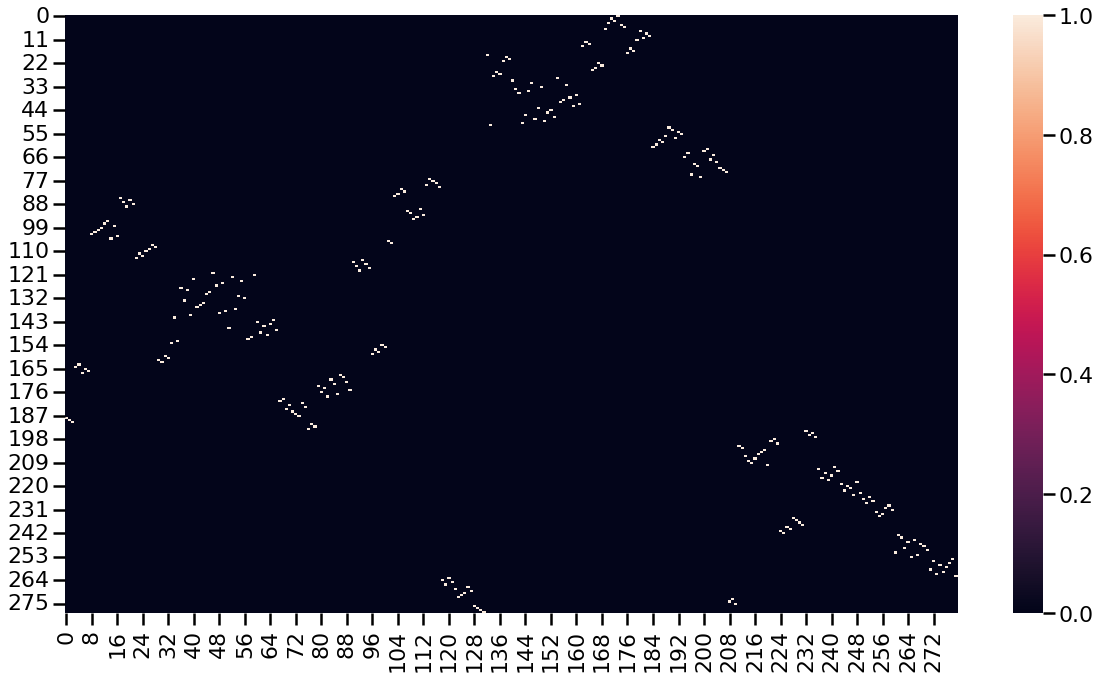

In [73]:
sns.heatmap(calibset[1][:280,:])

<AxesSubplot:>

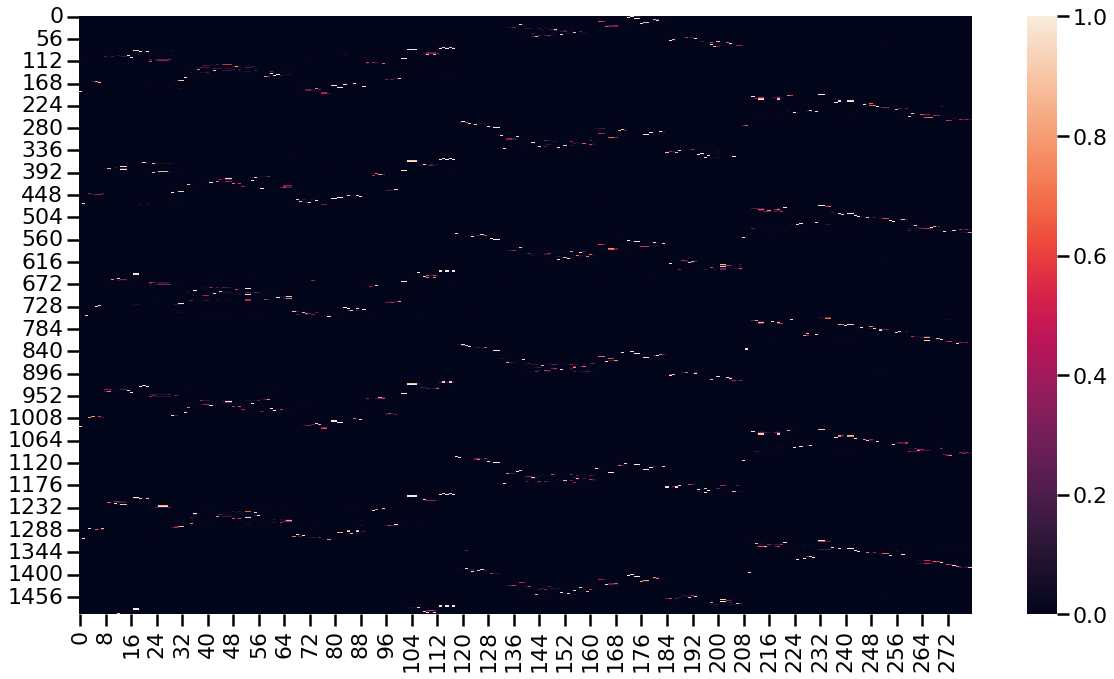

In [54]:
sns.heatmap(calib_predicted['v_allele'][:1500])

In [57]:
alignairr_predicted=predicted

In [56]:
from VDeepJUnbondedDataset import VDeepJUnbondedDataset
from VDeepJDataset import VDeepJDataset
vdj_dataset = VDeepJDataset(r"E:\Immunobiology\AlignAIRR\naive_sequences_clean.tsv")

In [58]:

def log_threshold(prediction,th=0.15):
    ast = np.argsort(prediction)[::-1]
    R = [ast[0]]
    for ip in range(1,len(ast)):
        DIFF = (prediction[ast[ip-1]]/prediction[ast[ip]])
        if DIFF<th:
            R.append(ast[ip])
        else:
            break
    return R
def preprocess_v_pred(v_family,v_gene,softmax,th=0.15):
    v_family_ = vdj_dataset.reverse_ohe_mapping['v_family'][np.argmax(v_family)]
        
    genes = list(vdj_dataset.call_sub_classes_map['V'][v_family_].keys())
    mask = np.zeros_like(v_gene)
    for a in genes:
        mask[vdj_dataset.v_gene_call_ohe[a]] = 1
    maksed_genes = v_gene*mask
    maksed_genes /=maksed_genes.sum()

    v_gene_ = vdj_dataset.reverse_ohe_mapping['v_gene'][np.argmax(maksed_genes)]

    alleles = vdj_dataset.call_sub_classes_map['V'][v_family_][v_gene_]

    mask = np.zeros_like(softmax)
    for a in alleles:
        mask[vdj_dataset.v_allele_call_ohe[a]] = 1
    maksed_softmax = softmax*mask
    maksed_softmax /=maksed_softmax.sum()

    cb_alleles = log_threshold(maksed_softmax,th=th)
    cb_alleles = [vdj_dataset.reverse_ohe_mapping['v_allele'][i] for i in cb_alleles]
    return [v_family_+'-'+v_gene_+'*'+i for i in cb_alleles]


In [ ]:
J = []
for v_gen,v_all in tqdm(zip(alignairr_predicted['j_gene'],alignairr_predicted['j_allele'])):
    j_alleles  = preprocess_j_pred(v_gene=v_gen,softmax=v_all)
    J.append(j_alleles)

In [200]:
hits = [len(set(i)&set(j.split(','))) > 0 for i,j in zip(V,vdj_dataset.data.v_call)]

In [207]:
hits_list = [hits]

In [201]:
sum(hits)/len(hits)

0.9640786638809713

In [208]:
# import os
# import pickle

# for file in tqdm([i for i in os.listdir('E:/Immunobiology/AlignAIRR/') if 'TH' in i]):
#     with open(f"E:/Immunobiology/AlignAIRR/{file}",'rb') as h:
#         V,D,J,alignairr_predicted = pickle.load(h)
#         hits = [len(set(i)&set(j.split(','))) > 0 for i,j in zip(V,vdj_dataset.data.v_call)]
#         hits_list.append(hits)

  0%|          | 0/5 [00:00<?, ?it/s]

In [212]:
pdf = pd.DataFrame({f'model_{en}':i for en,i in enumerate(hits_list)})

In [216]:
pdf['hit_sum'] = pdf.sum(axis=1)

In [222]:
bad_df = pdf[(~pdf.model_5) & (pdf.hit_sum < 4) ]

In [229]:
bad_data = vdj_dataset.data.loc[bad_df.index,:].copy()

In [232]:
bad_data

,sequence,v_sequence_start,v_sequence_end,d_sequence_start,d_sequence_end,j_sequence_start,j_sequence_end,v_call,d_call,j_call
80,GCTGGGAGAGGAGCCCCAGGCCCGGGATTCCCAGGTGTTTCCATTC...,135,429,430.0,434.0,435,483,IGHVF2-G15*05,"IGHD3-10*01,IGHD3-10*02",IGHJ3*02
81,GCTTTCTGAGAGTCATGGATCTCATGTGCAAGAAAATGAAGCACCT...,151,244,259.0,267.0,272,332,"IGHVF8-G45*04,IGHVF8-G45*07","IGHD2-2*01,IGHD2-2*02,IGHD2-2*03",IGHJ6*03
144,GAGAGAGGAGCCTTAGCCCTGGATTCCAAGGCCTATCCACTTGGTG...,131,425,NaN,NaN,432,476,IGHVF2-G11*06,NaN,IGHJ4*02
155,ACCATGGACTGTACCTGGGGGATCCTCTTCTTGGTGGCAGCTGCCA...,61,356,374.0,400.0,428,464,"IGHVF5-G29*03,IGHVF5-G29*05,IGHVF5-G29*06",IGHD2-8*01,IGHJ4*02
207,GAAGGAGCAAAAAAAAAGATCTACGGGGATCACATAACTACGCACA...,36,154,160.0,175.0,182,239,"IGHVF5-G26*01,IGHVF5-G26*02,IGHVF5-G26*03,IGHV...",IGHD4-17*01,IGHJ6*03
...,...,...,...,...,...,...,...,...,...,...
2759315,GAGCTCTGGGAGAGGAGCCCCAGCCTTGGGATTCCCAAGTGTTTTC...,140,432,435.0,440.0,442,487,IGHVF2-G10*01,"IGHD1-26*01,IGHD7-27*01",IGHJ4*02
2759317,GGCACTGGAAGTCGCCGGTGTTTCCATTCGGTGATCAGCACTGAAC...,119,393,NaN,NaN,409,449,IGHVF2-G14*13,NaN,IGHJ4*02
2759321,GGAGAGAGGAGCCTTAGCCCTGGATTCCAAGGCCTATCCACTTGGT...,132,426,434.0,441.0,450,487,IGHVF2-G18*02,"IGHD2-21*02,IGHD6-19*01",IGHJ3*02
2759322,GAGCTCTGAGAGAGGAGCCTTAGCCCTGGATTCCAAGGCCTATCCA...,139,432,NaN,NaN,442,484,IGHVF2-G11*06,NaN,IGHJ4*02


In [73]:
import datetime


'2023_08_26'

In [ ]:
import pickle
with open(r'E:\Immunobiology\AlignAIRR\p1_p11_s5f_noise008_vdeepjexp_v3_PROCESSED.pkl','wb') as h:
    pickle.dump((dataset_,V),h)

In [ ]:
import pickle
with open(r'E:\Immunobiology\AlignAIRR\p1_p11_vdeepjexp_v3_V_PROCESSED.pkl','rb') as h:
    V = pickle.load(h)
    
with open(r'E:\Immunobiology\AlignAIRR\p1_p11_vdeepjexp_v3.pkl','rb') as h:
    alignairr_predicted = pickle.load(h)

In [ ]:
from airrship.create_repertoire import generate_sequence,load_data,get_genotype,create_allele_dict
from collections import defaultdict
import importlib
def global_genotype():
    try:
        path_to_data = importlib.resources.files(
            'airrship').joinpath("data")
    except AttributeError:
        with importlib.resources.path('airrship', 'data') as p:
            path_to_data = p
    v_alleles = create_allele_dict(
        f"{path_to_data}/imgt_human_IGHV.fasta")
    d_alleles = create_allele_dict(
        f"{path_to_data}/imgt_human_IGHD.fasta")
    j_alleles = create_allele_dict(
        f"{path_to_data}/imgt_human_IGHJ.fasta")

    vdj_allele_dicts = {"V": v_alleles,
                        "D": d_alleles,
                        "J": j_alleles}

    chromosome1, chromosome2 = defaultdict(list), defaultdict(list)
    for segment in ["V", "D", "J"]:
        allele_dict = vdj_allele_dicts[segment]
        for gene in allele_dict.values():
            for allele in gene:
                chromosome1[segment].append(allele)
                chromosome2[segment].append(allele)

    locus = [chromosome1, chromosome2]
    return locus
S = generate_sequence(global_genotype(), load_data(), mutate=True,
                                     mutation_rate=np.random.uniform(0,0.15,1).item(),
                                     shm_flat=True, flat_usage='gene')


In [ ]:
S.ungapped_seq

'GAAGTGCAGCTGGTGGAGTCTGGGGGAGTCGTGGTACAGCCTGGGGGGTCCCTGAGACTCTCCTGTGCAGCCTCTGGATTCACCTTTGATGATTATGCCATGCACTGGGTCCGTCAAGCTCCGGGGAAGGGTCTGGAGTGGGTCTCTCTTATTAGTTGGGATGGTGGTAGCACCTACTATGCAGACTCTGTGAAGGGTCGATTCACCATCTCCAGAGACAACAGCAAAAACTCCCTGTATCTGCAAATGAACAGTCTGAGAGCTGAGGACACCGCCTTGTATTACTGTGCAAAAGATAGTCTTCCCATGACTGGACGCGCTGAATACTTCCAGCACTGGGGCCAGGGCACCCTGGTCACCGTCTCCTCAG'

In [ ]:
S.v_seq_end

298

In [ ]:
S.ungapped_seq[20:]

'TGGGGGAGTCGTGGTACAGCCTGGGGGGTCCCTGAGACTCTCCTGTGCAGCCTCTGGATTCACCTTTGATGATTATGCCATGCACTGGGTCCGTCAAGCTCCGGGGAAGGGTCTGGAGTGGGTCTCTCTTATTAGTTGGGATGGTGGTAGCACCTACTATGCAGACTCTGTGAAGGGTCGATTCACCATCTCCAGAGACAACAGCAAAAACTCCCTGTATCTGCAAATGAACAGTCTGAGAGCTGAGGACACCGCCTTGTATTACTGTGCAAAAGATAGTCTTCCCATGACTGGACGCGCTGAATACTTCCAGCACTGGGGCCAGGGCACCCTGGTCACCGTCTCCTCAG'

In [ ]:
mm = vdj_dataset.data[~np.array(hits)]

In [ ]:
mm[(mm.v_sequence_end-mm.v_sequence_start)<100].iloc[4,:]['v_call']

'IGHVF5-G26*12'

In [ ]:
import requests
import json
import re
from bs4 import BeautifulSoup


In [ ]:
# from bs4 import BeautifulSoup
# from IPython.display import display, HTML
# #BeautifulSoup(post.text)

# display(HTML(response.content))

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service
from bs4 import BeautifulSoup

class NCBI_IGBLAST:
    def __init__(self):
        service = Service(executable_path='C:/Users/Tomas/Downloads/chromedriver.exe')
        options = webdriver.ChromeOptions()
        options.add_argument('--headless')
        options.add_argument('--no-sandbox')
        options.add_argument('--disable-dev-shm-usage')
        self.driver = webdriver.Chrome(service=service, options=options)
        self.results = []  # List to store the results

    def search(self, text):
        # Navigate to the URL
        self.driver.get("https://www.ncbi.nlm.nih.gov/igblast/")
        
        # Find the textarea and enter the text
        queryseq_textarea = self.driver.find_element(By.ID, "queryseq")
        queryseq_textarea.clear()
        queryseq_textarea.send_keys(text)
        
        # Click the Search button
        search_button = self.driver.find_element(By.XPATH, '//input[@type="button" and @value="Search"]')
        search_button.click()

        # Wait for the page to load (you might need to adjust the timeout)
        WebDriverWait(self.driver, 30).until(
            EC.presence_of_element_located((By.ID, "content"))
        )

        # Return the page's HTML
        return self.driver.page_source

    def search_multiple(self, sequences):
        """Search multiple sequences and store the results in the results attribute."""
        for seq in tqdm(sequences):
            html_content = self.search(seq)
            self.results.append(html_content)

    def close(self):
        self.driver.quit()


